<a href="https://colab.research.google.com/github/mitchelljojo/Portofolio/blob/main/E_Commerce_Customer_Segmentation_using_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deck : [E-Commerce Segmentation](https://www.canva.com/design/DAFQPlx3zgw/EmMK8-TN9uO8jUlahfeKpA/edit?analyticsCorrelationId=549d8b2d-3de8-4ecb-8f6b-142824deb0fe)

# Simulation I : 22/10/2022

Background :
We have 4 data set that we need to check and our task today are :
1. Importing our dataset to Google Collab
2. Data Cleaning Process (Missing,Duplicate,Outlier,Converting, and Typo)
3. Merge all the data set into one data

# Library

In [ ]:
#Library for data cleaning and EDA Only!
import pandas as pd #dataset, etc
import numpy as np #Mathematical operation and creating array
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization needs
sns.set() #For changing the looks of matplot lib to seaborn

# Part I : Cleaning Data

## Users Dataset

### Importing & Data Dict

Link : https://docs.google.com/spreadsheets/d/1dV7Xunv6KI7Kbr0nP1ffn7I_mIms2-9LDCjryNHqWDE/edit#gid=0 

Data Dict :  
1. User_id -> List of user ID (Should be unique) 
2. Register_date -> Date user register, should be in timestamp
3. Name -> User Name 
4. Gender -> User Gender
5. Province -> Location
6. City ->User city location
Notes :
No need to check outlier since there are no numeric

In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1dV7Xunv6KI7Kbr0nP1ffn7I_mIms2-9LDCjryNHqWDE/edit#gid=0'
#to convert spreadsheet format become CSV then collab can import it
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') 
#define df to read csv
user_raw = pd.read_csv(sheet_url_trf) 
#to display all column, not separate)
pd.set_option('display.max.columns',None) 
#only show first of 5 rows (not based on shorting etc)
user_raw.head() 

,user_id,register_date,name,gender,province,city
0,10000,1/16/2020,Warta Pradipta,male,DKI Jakarta,Jakarta Utara
1,10001,3/10/2018,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya
2,10002,7/6/2018,Balidin Sitorus,male,DKI Jakarta,South Jakarta
3,10003,11/19/2018,Cemani Narpati,male,Banten,Tangerang Selatan
4,10004,3/19/2021,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang


In [ ]:
#Checking Data Type
user_raw.info()
#Based on this we can change the register_date to timestamp but will do it later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        1727 non-null   int64 
 1   register_date  1721 non-null   object
 2   name           1722 non-null   object
 3   gender         1721 non-null   object
 4   province       1727 non-null   object
 5   city           1727 non-null   object
dtypes: int64(1), object(5)
memory usage: 81.1+ KB


### Handling Missing Value

In [ ]:
#Check Total missing value
user_raw.isna().sum()
#Decision _____ ?

user_id          0
register_date    6
name             5
gender           6
province         0
city             0
dtype: int64

In [ ]:
#Reason : We can't do backfill to this kind of value because it will not accurate
user_raw.dropna(subset=['register_date','name','gender'], inplace=True)
user_raw.isna().sum()

user_id          0
register_date    0
name             0
gender           0
province         0
city             0
dtype: int64

### Duplicate Value

In [ ]:
#Check Duplicate Value
user_raw[user_raw['user_id'].duplicated()]

,user_id,register_date,name,gender,province,city
12,10001,3/10/2018,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya
13,10002,7/6/2018,Balidin Sitorus,male,DKI Jakarta,South Jakarta
14,10003,11/19/2018,Cemani Narpati,male,Banten,Tangerang Selatan
15,10004,3/19/2021,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang
16,10005,2/25/2018,Pranata Lega Firgantoro S.Pt,male,DKI Jakarta,Jakarta Selatan
17,10006,2/24/2018,Slamet Nashiruddin,male,Banten,Kota Tangerang
18,10007,4/12/2019,Bancar Firgantoro,male,Jawa Tengah,Semarang
19,10008,3/25/2020,Warji Harimurti Utama,male,Banten,Kota Tangerang
20,10009,10/13/2019,Daniswara Raden Pradipta,male,DKI Jakarta,Jakarta Barat
21,10010,8/1/2019,Asmuni Saputra S.E.,male,DKI Jakarta,Jakarta Pusat


In [ ]:
#Remove and checking the duplicate value
user_raw1 = user_raw.drop_duplicates(['user_id'])
user_raw1[user_raw1['user_id'].duplicated()]

,user_id,register_date,name,gender,province,city


### Changing Data Type

In [ ]:
#Changing register date to timestamp due to its still as object
user_raw1['register_date'] = pd.to_datetime(user_raw1['register_date'])
#Changing to string
user_raw1['user_id'] = user_raw1['user_id'].astype(str)
#Check data type
user_raw1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 1710
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        1694 non-null   object        
 1   register_date  1694 non-null   datetime64[ns]
 2   name           1694 non-null   object        
 3   gender         1694 non-null   object        
 4   province       1694 non-null   object        
 5   city           1694 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 92.6+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
user_raw1.tail()

,user_id,register_date,name,gender,province,city
1700,20988,2020-11-04,Shania Syahrini Novitasari S.Ked,female,DKI Jakarta,Jakarta Utara
1701,20989,2020-05-18,Kania Nuraini M.Farm,female,Jawa Barat,Kota Bogor
1702,20990,2018-05-02,Eka Safina Suartini,female,DKI Jakarta,Jakarta Selatan
1709,20997,2021-05-09,Tira Genta Oktaviani,female,Jawa Timur,Surabaya
1710,20998,2019-08-26,Carla Mila Mandasari S.IP,female,Banten,Tangerang Selatan


### Handling Typos

In [ ]:
#Check typo for province
user_typo = user_raw1['province'].unique().tolist()
user_typo1 = user_raw1['gender'].unique().tolist()
user_typo2 = user_raw1['city'].unique().tolist()
print(user_typo)
print(user_typo1)
print(user_typo2)

['DKI Jakarta', 'Jawa Timur', 'Banten', 'Jawa Tengah', 'Jawa Barat']
['male', 'female']
['Jakarta Utara', 'Surabaya', 'South Jakarta', 'Tangerang Selatan', 'Semarang', 'Jakarta Selatan', 'Kota Tangerang', 'Jakarta Barat', 'Jakarta Pusat', 'Jakarta Timur', 'Kota Bogor', 'Central Jakarta', 'Kota Depok', 'surabaya', 'Kota Bekasi', 'Bandung']


Typo : 
- South Jakarta = Jakarta Selatan
- Central Jakarta = Jakarta Pusat
- surabaya = Surabaya

In [ ]:
user_raw1['city'].replace(to_replace = ['South Jakarta'],
                          value = 'Jakarta Selatan', inplace=True)
user_raw1['city'].replace(to_replace = ['Central Jakarta'],value = 'Jakarta Pusat', inplace=True)
user_raw1['city'].replace(to_replace = ['surabaya'],value = 'Surabaya', inplace=True)
user_raw1['city'].unique().tolist()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


['Jakarta Utara',
 'Surabaya',
 'Jakarta Selatan',
 'Tangerang Selatan',
 'Semarang',
 'Kota Tangerang',
 'Jakarta Barat',
 'Jakarta Pusat',
 'Jakarta Timur',
 'Kota Bogor',
 'Kota Depok',
 'Kota Bekasi',
 'Bandung']

In [ ]:
#Cleaned data set to dataframe
df_user = user_raw1

## Transaction Dataset

### Importing & Data Dict

In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1FOvLKlf4tOP8iN8jwahxGFUCYxB2XFB0Ba-1AWhTkig/edit#gid=0' 
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') 
raw_trans = pd.read_csv(sheet_url_trf) 
raw_trans.tail() 

,event_name,transaction-date,user_id,payment_method_id,transaction_id
10527,NaN,12/14/2021 15:16:15,20852,5.0,308580.0
10528,NaN,12/14/2021 17:42:41,20757,5.0,307177.0
10529,Completed,12/14/2021 17:42:43,20475,3.0,306766.0
10530,Completed,12/14/2021 17:55:23,10682,3.0,307700.0
10531,Completed,12/14/2021 18:24:06,20937,5.0,307701.0


Data Dict : 
1. Event name ->  Status of transaction
2. Transaction-date -> Date of user create the transaction
3. User_id -> Unique user_id 
4. payment_method_id -> Unique payment_method
5. transaction_id -> Unique ID of Transaction

### Handling Missing Value

In [ ]:
#Check how many missing value
raw_trans.isna().sum()

event_name           52
transaction-date     20
user_id               5
payment_method_id     3
transaction_id        6
dtype: int64

In [ ]:
raw_trans[raw_trans['event_name'].isnull()]

,event_name,transaction-date,user_id,payment_method_id,transaction_id
9961,NaN,NaN,20983,2.0,307614.0
9962,NaN,NaN,10364,2.0,307113.0
9963,NaN,NaN,20845,3.0,307615.0
9964,NaN,NaN,10314,5.0,306693.0
9965,NaN,NaN,10270,5.0,306694.0
9966,NaN,NaN,10567,3.0,307616.0
9967,NaN,NaN,20884,5.0,307617.0
9968,NaN,NaN,20271,4.0,306695.0
9969,NaN,NaN,20811,1.0,307114.0
9970,NaN,NaN,20623,3.0,307115.0


In [ ]:
#Drop NaN Value
raw_trans_drop = raw_trans.copy()
raw_trans_drop = raw_trans_drop.dropna()
raw_trans_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10473 entries, 0 to 10531
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   event_name         10473 non-null  object 
 1   transaction-date   10473 non-null  object 
 2   user_id            10473 non-null  object 
 3   payment_method_id  10473 non-null  float64
 4   transaction_id     10473 non-null  float64
dtypes: float64(2), object(3)
memory usage: 490.9+ KB


In [ ]:
#Check Again for NA Value
raw_trans_drop.isna().sum()

event_name           0
transaction-date     0
user_id              0
payment_method_id    0
transaction_id       0
dtype: int64

### Convert Data Type

transaction-date <- Should be date time
user_id, 
payment_method_id, 
transaction_id <- should be string

In [ ]:
#Return to raw data set
raw_trans = raw_trans_drop
#Change datetime, error running value became NaN value
raw_trans['transaction-date'] = pd.to_datetime(raw_trans['transaction-date'],
                                               errors='coerce')
#Change into string type
raw_trans[['user_id','payment_method_id','transaction_id']] = raw_trans[
    ['user_id','payment_method_id','transaction_id']].astype(str)
raw_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10473 entries, 0 to 10531
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   event_name         10473 non-null  object        
 1   transaction-date   10470 non-null  datetime64[ns]
 2   user_id            10473 non-null  object        
 3   payment_method_id  10473 non-null  object        
 4   transaction_id     10473 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 490.9+ KB


In [ ]:
#Check again due to before we will change error into NaN value
raw_trans.isna().sum()

event_name           0
transaction-date     3
user_id              0
payment_method_id    0
transaction_id       0
dtype: int64

In [ ]:
df_trans = raw_trans.dropna()
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10470 entries, 0 to 10531
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   event_name         10470 non-null  object        
 1   transaction-date   10470 non-null  datetime64[ns]
 2   user_id            10470 non-null  object        
 3   payment_method_id  10470 non-null  object        
 4   transaction_id     10470 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 490.8+ KB


### **String Manipulation**

In [ ]:
#In here we have the data in transaction ID xxx.x hence need to change first
df_trans_spl = df_trans['transaction_id'].str.split('.',expand = True)
df_trans_spl.tail()

,0,1
10520,307174,0
10521,307697,0
10529,306766,0
10530,307700,0
10531,307701,0


In [ ]:
df_trans_pay = df_trans['payment_method_id'].str.split('.',expand=True)
df_trans_pay.head()

,0,1
0,3,0
1,3,0
2,4,0
3,3,0
4,5,0


In [ ]:
#Append into the maindata set
df_trans['transaction_ID'] = df_trans_spl[0]
df_trans.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_name,transaction-date,user_id,payment_method_id,transaction_id,transaction_ID
0,Completed,2020-01-01 06:29:14,20926,3.0,201289.0,201289
1,Completed,2020-01-01 06:51:01,20706,3.0,201108.0,201108
2,Completed,2020-01-01 08:08:41,10535,4.0,201109.0,201109
3,Completed,2020-01-01 08:18:00,10437,3.0,201110.0,201110
4,Completed,2020-01-01 09:07:44,10618,5.0,201290.0,201290


In [ ]:
#Append into the maindata set
df_trans['payment_method_ID'] = df_trans_pay[0]
df_trans.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_name,transaction-date,user_id,payment_method_id,transaction_id,transaction_ID,payment_method_ID
0,Completed,2020-01-01 06:29:14,20926,3.0,201289.0,201289,3
1,Completed,2020-01-01 06:51:01,20706,3.0,201108.0,201108,3
2,Completed,2020-01-01 08:08:41,10535,4.0,201109.0,201109,4
3,Completed,2020-01-01 08:18:00,10437,3.0,201110.0,201110,3
4,Completed,2020-01-01 09:07:44,10618,5.0,201290.0,201290,5


In [ ]:
#drop the unused column
df_trans = df_trans.drop(['payment_method_id','transaction_id'],axis=1)
df_trans.head()

,event_name,transaction-date,user_id,transaction_ID,payment_method_ID
0,Completed,2020-01-01 06:29:14,20926,201289,3
1,Completed,2020-01-01 06:51:01,20706,201108,3
2,Completed,2020-01-01 08:08:41,10535,201109,4
3,Completed,2020-01-01 08:18:00,10437,201110,3
4,Completed,2020-01-01 09:07:44,10618,201290,5


## Payment Method Dataset

### Importing & Data Dict

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1fJ4nuarwyHYaPpkTPrpol3OYlHRrTzdUdwOMvl57CO4/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
raw_pay = pd.read_csv(sheet_url_trf) 
raw_pay.head() 

,payment_id,payment_method
0,1,credit card
1,2,debit card
2,3,transfer
3,4,e-wallet
4,5,paylater


Data Dict : 
1. Payment ID : Unique ID -> Hence why data in transaction need to be removed for the (.) 
2. Payment_Method = Payment Type 

### Check Missing Value

In [ ]:
raw_pay.isna().sum()

payment_id        0
payment_method    0
dtype: int64

### Checking Duplicated Value

In [ ]:
raw_pay[raw_pay['payment_id'].duplicated()]

,payment_id,payment_method


### Checking Typo

In [ ]:
raw_pay['payment_method'].unique().tolist()

['credit card', 'debit card', 'transfer', 'e-wallet', 'paylater']

### Converting Data type

In [ ]:
raw_pay['payment_id'] = raw_pay['payment_id'].astype(str)
df_pay = raw_pay
df_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   payment_id      5 non-null      object
 1   payment_method  5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


## Transaction Item Dataset

### Importing & Data Dict

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1gLBNZtMWm1pITCk_YI4cZn0PZzrr0ZnYYfqOsM_7wR0/edit#gid=0' 
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')  #to convert spreadsheet format become CSV then collab can import it
raw_trans_items = pd.read_csv(sheet_url_trf) 
raw_trans_items.head()

,transaction_item_id,transaction_id,Event_name,product_id,qty,price,total_amount
0,2010011,201001,Completed,10015,1,30000,30000
1,2010021,201002,Completed,10020,1,50000,50000
2,2010031,201003,Completed,10000,1,100000,100000
3,2010041,201004,Completed,10007,1,300000,300000
4,2010051,201005,Completed,10010,1,25000,25000


Data Dict : 
1. Trans_item_id -> Transaction item ID
2. Transaction_id -> Transaction ID
3. Event_Name -> Name of Event
4. product_id -> Product ID
5. qty -> count of product
6. Price -> product price
7. total_amount -> price*qty

In [ ]:
#checking data info
raw_trans_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15822 entries, 0 to 15821
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   transaction_item_id  15822 non-null  int64 
 1   transaction_id       15822 non-null  int64 
 2   Event_name           15822 non-null  object
 3   product_id           15822 non-null  int64 
 4   qty                  15822 non-null  int64 
 5   price                15822 non-null  int64 
 6   total_amount         15822 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 865.4+ KB


### Missing Value

In [ ]:
#Check Missing Value
raw_trans_items.isna().sum()

transaction_item_id    0
transaction_id         0
Event_name             0
product_id             0
qty                    0
price                  0
total_amount           0
dtype: int64

### Check Duplicate Value

In [ ]:
#Check Duplicated Value
raw_trans_items.duplicated().sum()

0

### Convert Data Type

In [ ]:
#Filter list of column
Trans_Items = ['transaction_item_id','transaction_id','product_id']
raw_trans_items[Trans_Items] = raw_trans_items[Trans_Items].astype(str)
raw_trans_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15822 entries, 0 to 15821
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   transaction_item_id  15822 non-null  object
 1   transaction_id       15822 non-null  object
 2   Event_name           15822 non-null  object
 3   product_id           15822 non-null  object
 4   qty                  15822 non-null  int64 
 5   price                15822 non-null  int64 
 6   total_amount         15822 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 865.4+ KB


### Handling Outlier

### Boxplot

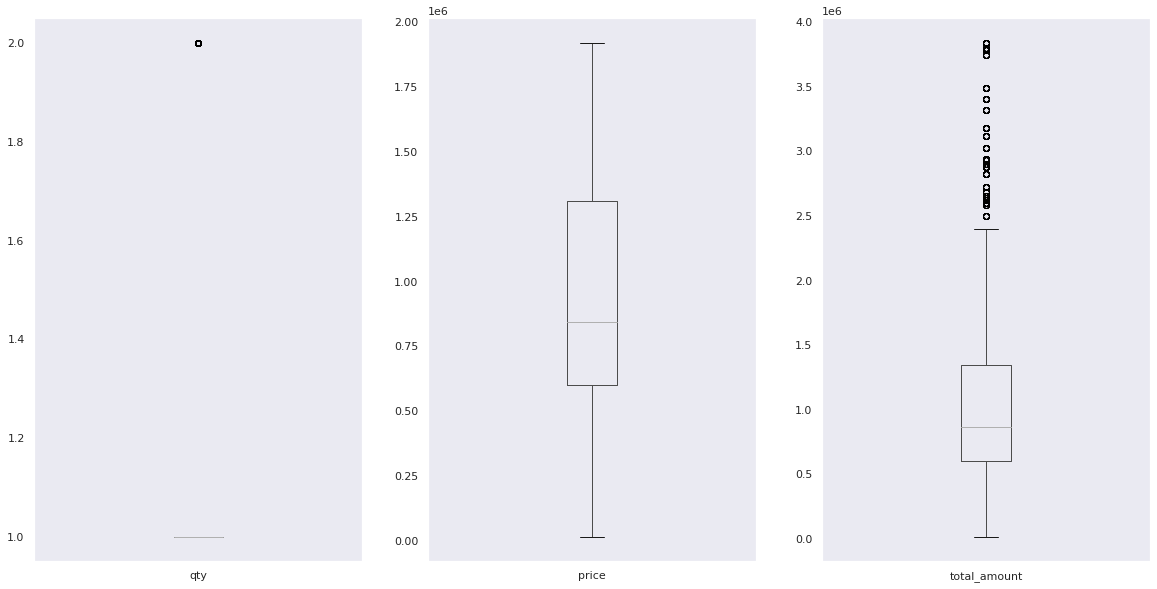

In [ ]:
#Checking Outlier
num_col = ['qty','price','total_amount']
#Chart position and size
fig, axes = plt.subplots(nrows = 1,
                         ncols = 3,
                         figsize = (20,10))
#for 0 (i), Income
for i,el in enumerate(num_col):
  a= raw_trans_items.boxplot(el, 
                             ax=axes.flatten()[i],
                             grid=False)
#Show the box plot
plt.show()

Seaborn : 
https://seaborn.pydata.org/generated/seaborn.boxplot.html

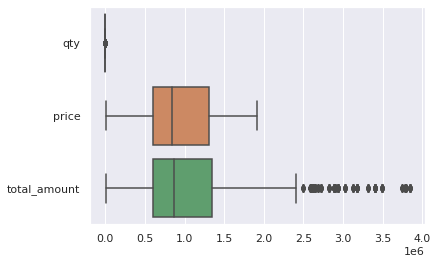

In [ ]:
#Boxplot using seaborn
sns.boxplot(data=raw_trans_items
            [['qty','price','total_amount']],orient="h")

### IQR Method

In [ ]:
#Find Q1 and Q3
Q1 = raw_trans_items['total_amount'].quantile(0.25)
Q3 = raw_trans_items['total_amount'].quantile(0.75)
IQR = Q3-Q1
#Find batas bawah dan atas
Box_Min = Q1 - 1.5 * IQR
Box_Max = Q3 + 1.5 * IQR
#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',Box_Min)
print('\nMax:\n',Box_Max)

Q1:
 600000.0

Q3:
 1340000.0

IQR:
 740000.0

Min:
 -510000.0

Max:
 2450000.0


In [ ]:
#Create Filtering
Fil_Min = raw_trans_items['total_amount'] < Box_Min
Fil_Max = raw_trans_items['total_amount'] > Box_Max
#Drop outlier
raw_trans_items_clean = raw_trans_items.loc[~(Fil_Min | Fil_Max)]
df_trans_items = raw_trans_items_clean
df_trans_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15550 entries, 0 to 15821
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   transaction_item_id  15550 non-null  object
 1   transaction_id       15550 non-null  object
 2   Event_name           15550 non-null  object
 3   product_id           15550 non-null  object
 4   qty                  15550 non-null  int64 
 5   price                15550 non-null  int64 
 6   total_amount         15550 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 971.9+ KB


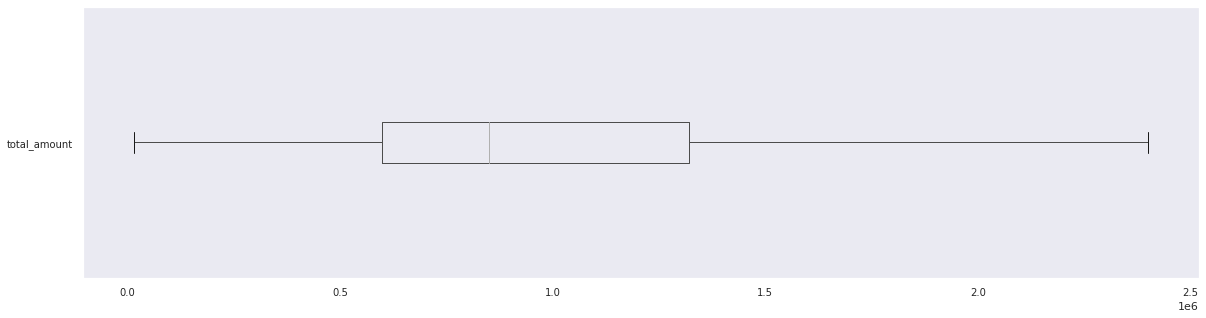

In [ ]:
#Using Matplotlib
df_trans_items.boxplot(column=['total_amount'],
                       fontsize=10,
                       rot=0,
                       grid=False,
                       figsize=(20,5),
                       vert=False)

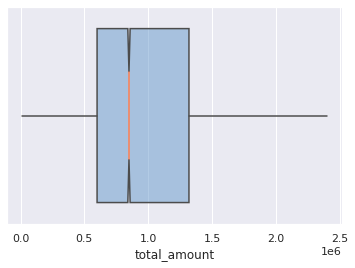

In [ ]:
#Visualization using seaborn
sns.boxplot(x=df_trans_items['total_amount'],
            notch=True, showcaps=False,
            boxprops={"facecolor":(.4, .6, .8, .5)},
            medianprops = {"color" :"Coral"})

# Part II : Merge Data

In [ ]:
merge_1 = df_user.merge(df_trans, how = 'inner', on='user_id')
merge_2 = merge_1.merge(df_trans_items, how ='inner' , left_on = 'transaction_ID', right_on='transaction_id')
merge_3 = merge_2.merge(df_pay,how='inner', left_on = 'payment_method_ID',right_on='payment_id')
merge_3.head()

,user_id,register_date,name,gender,province,city,event_name,transaction-date,transaction_ID,payment_method_ID,transaction_item_id,transaction_id,Event_name,product_id,qty,price,total_amount,payment_id,payment_method
0,10000,2020-01-16,Warta Pradipta,male,DKI Jakarta,Jakarta Utara,Completed,2020-12-21 21:32:08,301363,5,3013631,301363,Completed,10012,1,75000,75000,5,paylater
1,10000,2020-01-16,Warta Pradipta,male,DKI Jakarta,Jakarta Utara,Completed,2020-12-21 21:32:08,301363,5,3013632,301363,Completed,10022,1,20000,20000,5,paylater
2,10001,2018-03-10,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya,Completed,2020-12-16 16:14:45,301341,5,3013411,301341,Completed,10004,1,250000,250000,5,paylater
3,10001,2018-03-10,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya,Completed,2020-12-16 16:14:45,301341,5,3013412,301341,Completed,10018,1,50000,50000,5,paylater
4,10001,2018-03-10,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya,Completed,2021-11-17 15:44:48,306658,5,3066581,306658,Completed,10009,1,50000,50000,5,paylater


In [ ]:
#Delete unnecessery column
df = merge_3.copy()
df = df.drop(['transaction_ID','payment_method_ID'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15315
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              15316 non-null  object        
 1   register_date        15316 non-null  datetime64[ns]
 2   name                 15316 non-null  object        
 3   gender               15316 non-null  object        
 4   province             15316 non-null  object        
 5   city                 15316 non-null  object        
 6   event_name           15316 non-null  object        
 7   transaction-date     15316 non-null  datetime64[ns]
 8   transaction_item_id  15316 non-null  object        
 9   transaction_id       15316 non-null  object        
 10  Event_name           15316 non-null  object        
 11  product_id           15316 non-null  object        
 12  qty                  15316 non-null  int64         
 13  price                15316 non-

In [ ]:
df1 = df.copy()
df1.drop_duplicates(['user_id'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15315
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              15316 non-null  object        
 1   register_date        15316 non-null  datetime64[ns]
 2   name                 15316 non-null  object        
 3   gender               15316 non-null  object        
 4   province             15316 non-null  object        
 5   city                 15316 non-null  object        
 6   event_name           15316 non-null  object        
 7   transaction-date     15316 non-null  datetime64[ns]
 8   transaction_item_id  15316 non-null  object        
 9   transaction_id       15316 non-null  object        
 10  Event_name           15316 non-null  object        
 11  product_id           15316 non-null  object        
 12  qty                  15316 non-null  int64         
 13  price                15316 non-

# Part III : EDA

### Descriptive Statistic

In [ ]:
df1.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_id,register_date,name,gender,province,city,event_name,transaction-date,transaction_item_id,transaction_id,Event_name,product_id,qty,price,total_amount,payment_id,payment_method
count,15316,15316,15316,15316,15316,15316,15316,15316,15316,15316,15316,15316,15316.000000,1.531600e+04,1.531600e+04,15316,15316
unique,1602,954,1599,2,5,13,2,10210,15300,10211,2,101,NaN,NaN,NaN,5,5
top,20854,2020-11-04 00:00:00,Suci Winarsih,female,DKI Jakarta,Jakarta Pusat,Completed,2020-12-21 13:09:47,3071591,201001,Completed,30010,NaN,NaN,NaN,5,paylater
freq,49,99,49,9205,6638,2022,13831,4,2,4,13831,188,NaN,NaN,NaN,5291,5291
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2020-01-01 06:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,2021-12-30 21:45:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.041264,8.625084e+05,8.861986e+05,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198907,5.364080e+05,5.517809e+05,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.500000e+04,1.500000e+04,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.000000e+05,6.000000e+05,NaN,NaN


Insight :
1. We have 1602 user ID with majority of them are female

In [ ]:
df1.duplicated().sum()

16

In [ ]:
df1 = df1.drop_duplicates(['user_id'])
df1[df1['user_id'].duplicated()]

,user_id,register_date,name,gender,province,city,event_name,transaction-date,transaction_item_id,transaction_id,Event_name,product_id,qty,price,total_amount,payment_id,payment_method


In [ ]:
#Creating Year,Month,Day Variable
import datetime
df1['Register_Month'] = df1['register_date'].dt.strftime('%m')
df1['Register_Year'] = df1['register_date'].dt.strftime('%Y')
df1['Register_Day'] = df1['register_date'].dt.strftime('%d')
df1

,user_id,register_date,name,gender,province,city,event_name,transaction-date,transaction_item_id,transaction_id,Event_name,product_id,qty,price,total_amount,payment_id,payment_method,Register_Month,Register_Year,Register_Day
0,10000,2020-01-16,Warta Pradipta,male,DKI Jakarta,Jakarta Utara,Completed,2020-12-21 21:32:08,3013631,301363,Completed,10012,1,75000,75000,5,paylater,01,2020,16
2,10001,2018-03-10,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya,Completed,2020-12-16 16:14:45,3013411,301341,Completed,10004,1,250000,250000,5,paylater,03,2018,10
5,10002,2018-07-06,Balidin Sitorus,male,DKI Jakarta,Jakarta Selatan,Completed,2020-10-24 20:59:55,3011101,301110,Completed,10010,1,25000,25000,5,paylater,07,2018,06
11,10003,2018-11-19,Cemani Narpati,male,Banten,Tangerang Selatan,Completed,2021-04-27 21:53:09,3040811,304081,Completed,10000,1,100000,100000,5,paylater,11,2018,19
13,10004,2021-03-19,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang,Completed,2020-11-29 15:34:34,3012701,301270,Completed,10010,1,25000,25000,5,paylater,03,2021,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14781,20145,2021-06-15,Titi Namaga M.Pd,female,Banten,Tangerang Selatan,Completed,2021-11-19 19:41:42,3066671,306667,Completed,10021,1,20000,20000,1,credit card,06,2021,15
14799,20228,2020-02-23,Fitria Wastuti,female,Jawa Tengah,Semarang,Completed,2020-07-18 16:48:38,2025451,202545,Completed,10010,1,25000,25000,1,credit card,02,2020,23
14807,20292,2021-12-25,Lala Sakura Uyainah,female,DKI Jakarta,Jakarta Selatan,Completed,2020-11-24 16:35:27,3012451,301245,Completed,10004,1,250000,250000,1,credit card,12,2021,25
14811,20323,2019-05-18,Raisa Ida Wijayanti M.Ak,female,DKI Jakarta,Jakarta Selatan,Completed,2021-10-04 08:34:04,3064891,306489,Completed,10002,1,200000,200000,1,credit card,05,2019,18


### Monthly Transaction For Each Year

In [ ]:
#Number of transaction for each year and month
MonthlyTransaction = df1.groupby(['Register_Year','Register_Month'])['user_id'].count().reset_index()
MonthlyTransaction.head()

,Register_Year,Register_Month,user_id
0,2018,01,38
1,2018,02,36
2,2018,03,36
3,2018,04,43
4,2018,05,30


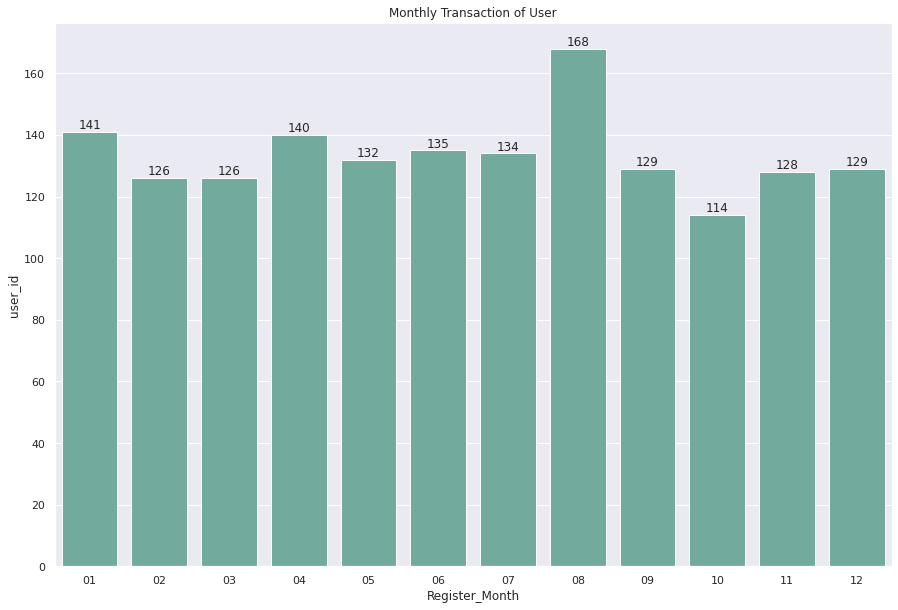

In [ ]:
#Total Transaction
sns.set(rc={'figure.figsize':(15,10)})
# plot a bar chart
ax = sns.barplot(
    x="Register_Month", 
    y="user_id", 
    data=MonthlyTransaction, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2')
ax.set(title='Monthly Transaction of User')
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), 
# x-coordinate position of data label, padded to be in the middle of the bar
 # y-coordinate position of data label, padded 100 above bar
 y = height+1, 
 # data label, formatted to ignore decimals
 s = '{:.0f}'.format(height),
  # sets horizontal alignment (ha) to center
 ha = 'center')


For our Monthly Transaction : 
1. The lowest are from 2019 in March and from 2019 - 2021 our transaction are dropping 

### Payment Method Based on Gender

In [ ]:
#Payment Method based on gender
Payment = df1.groupby(['gender','payment_method'])['user_id'].count().reset_index()
Payment

,gender,payment_method,user_id
0,female,credit card,10
1,female,debit card,27
2,female,e-wallet,70
3,female,paylater,727
4,female,transfer,106
5,male,credit card,8
6,male,debit card,20
7,male,e-wallet,35
8,male,paylater,506
9,male,transfer,93


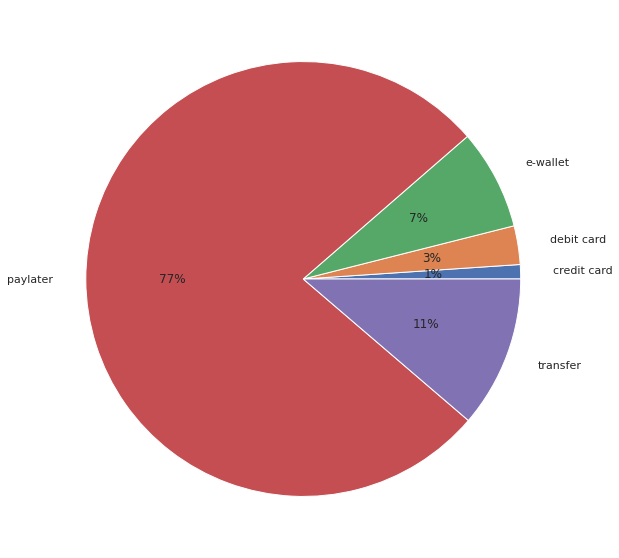

In [ ]:
FemaleP = Payment[0:5]
names=FemaleP['payment_method']
values=FemaleP['user_id']
plt.pie(values, labels=names, labeldistance=1.15,autopct='%.0f%%');
plt.show();

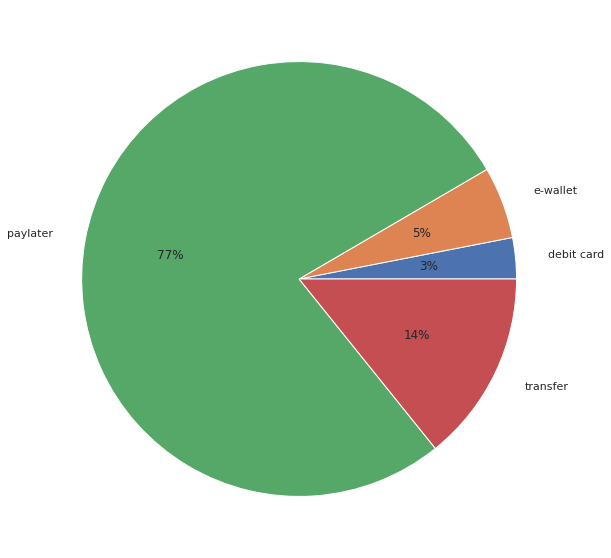

In [ ]:
MaleP = Payment[6:]
names=MaleP['payment_method']
values=MaleP['user_id']
plt.pie(values, labels=names, labeldistance=1.15,autopct='%.0f%%');
plt.show();

### Percentage of our Total User

In [ ]:
Total_User = df1.groupby(['gender'])['user_id'].count().reset_index()
Total_User

,gender,user_id
0,female,940
1,male,662


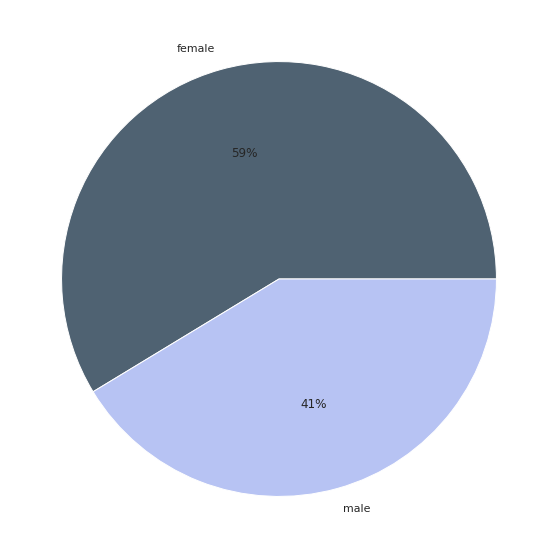

In [ ]:
#Creating Pie Chart
data = Total_User['user_id']
keys = Total_User['gender']
# define Seaborn color palette to use
explode = [5, 5]
colors = ['#4F6272', '#B7C3F3']
# plotting data on chart
plt.pie(data, labels=keys, colors=colors, autopct='%.0f%%')
# displaying chart
plt.show()

Majority of our user are Female which is 59% of them

### Week to Week Of Activity by Gender

In [ ]:
df1.tail()

,user_id,register_date,name,gender,province,city,event_name,transaction-date,transaction_item_id,transaction_id,Event_name,product_id,qty,price,total_amount,payment_id,payment_method,Register_Month,Register_Year,Register_Day
14781,20145,2021-06-15,Titi Namaga M.Pd,female,Banten,Tangerang Selatan,Completed,2021-11-19 19:41:42,3066671,306667,Completed,10021,1,20000,20000,1,credit card,06,2021,15
14799,20228,2020-02-23,Fitria Wastuti,female,Jawa Tengah,Semarang,Completed,2020-07-18 16:48:38,2025451,202545,Completed,10010,1,25000,25000,1,credit card,02,2020,23
14807,20292,2021-12-25,Lala Sakura Uyainah,female,DKI Jakarta,Jakarta Selatan,Completed,2020-11-24 16:35:27,3012451,301245,Completed,10004,1,250000,250000,1,credit card,12,2021,25
14811,20323,2019-05-18,Raisa Ida Wijayanti M.Ak,female,DKI Jakarta,Jakarta Selatan,Completed,2021-10-04 08:34:04,3064891,306489,Completed,10002,1,200000,200000,1,credit card,05,2019,18
14969,20755,2018-12-18,Ida Wahyuni,female,Jawa Barat,Kota Depok,Completed,2021-09-10 13:19:38,3056771,305677,Completed,20020,1,630000,630000,1,credit card,12,2018,18


In [ ]:
df1['Days'] = df1['register_date'].dt.strftime('%a')
df1.head()

,user_id,register_date,name,gender,province,city,event_name,transaction-date,transaction_item_id,transaction_id,Event_name,product_id,qty,price,total_amount,payment_id,payment_method,Register_Month,Register_Year,Register_Day,Days
0,10000,2020-01-16,Warta Pradipta,male,DKI Jakarta,Jakarta Utara,Completed,2020-12-21 21:32:08,3013631,301363,Completed,10012,1,75000,75000,5,paylater,01,2020,16,Thu
2,10001,2018-03-10,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya,Completed,2020-12-16 16:14:45,3013411,301341,Completed,10004,1,250000,250000,5,paylater,03,2018,10,Sat
5,10002,2018-07-06,Balidin Sitorus,male,DKI Jakarta,Jakarta Selatan,Completed,2020-10-24 20:59:55,3011101,301110,Completed,10010,1,25000,25000,5,paylater,07,2018,06,Fri
11,10003,2018-11-19,Cemani Narpati,male,Banten,Tangerang Selatan,Completed,2021-04-27 21:53:09,3040811,304081,Completed,10000,1,100000,100000,5,paylater,11,2018,19,Mon
13,10004,2021-03-19,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang,Completed,2020-11-29 15:34:34,3012701,301270,Completed,10010,1,25000,25000,5,paylater,03,2021,19,Fri


In [ ]:
# Setup Categorical for sorting variable
c_s = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
       'Sun']
cat_dtype = pd.Categorical(c_s, ordered=True)
df1['Days'] = pd.Categorical(df1['Days'],
                                    categories=c_s,
                                    ordered=True)
df1 = df1.sort_values(by= "Days")
df1.head()

,user_id,register_date,name,gender,province,city,event_name,transaction-date,transaction_item_id,transaction_id,Event_name,product_id,qty,price,total_amount,payment_id,payment_method,Register_Month,Register_Year,Register_Day,Days
2322,20203,2019-06-10,Lidya Nuraini,female,DKI Jakarta,Jakarta Pusat,Completed,2020-05-18 08:51:29,2017501,201750,Completed,10003,1,200000,200000,5,paylater,06,2019,10,Mon
2959,20595,2021-11-01,Novi Haryanti,female,Jawa Barat,Bandung,Completed,2020-10-17 17:45:15,3015231,301523,Completed,20004,1,800000,800000,5,paylater,11,2021,01,Mon
491,10380,2021-08-09,Viktor Iswahyudi M.M.,male,Jawa Barat,Bandung,Completed,2020-05-15 09:04:05,2019291,201929,Completed,20025,1,720000,720000,5,paylater,08,2021,09,Mon
5391,10132,2020-04-06,Nrima Wahyudin,male,Jawa Barat,Bandung,Completed,2020-06-25 14:12:53,2017991,201799,Completed,10009,1,50000,50000,3,transfer,04,2020,06,Mon
5378,10113,2021-12-13,Empluk Nugroho,male,Banten,Kota Tangerang,Completed,2020-11-21 10:04:29,3012231,301223,Completed,10024,1,15000,15000,3,transfer,12,2021,13,Mon


In [ ]:
#Creating Group By for male and Female
Heatmap = df1.groupby(['gender','Register_Month','Days'])['user_id'].count().reset_index().sort_values(by=['Days'])
HeatM = Heatmap[Heatmap.gender =="male"].reset_index()
HeatF = Heatmap[Heatmap.gender =="female"].reset_index()


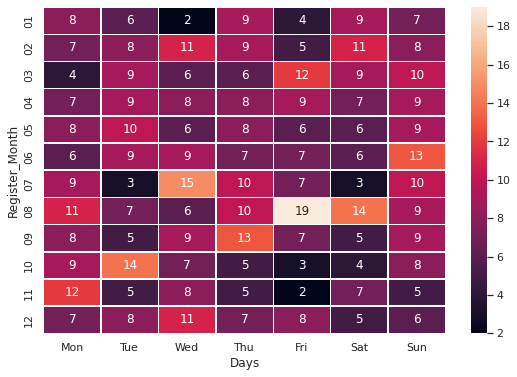

In [ ]:
#Activities for Male User
heatmap1 = HeatM.pivot("Register_Month","Days","user_id")
sns.set_theme()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(heatmap1, annot=True,fmt='d',linewidth=.5,ax=ax)

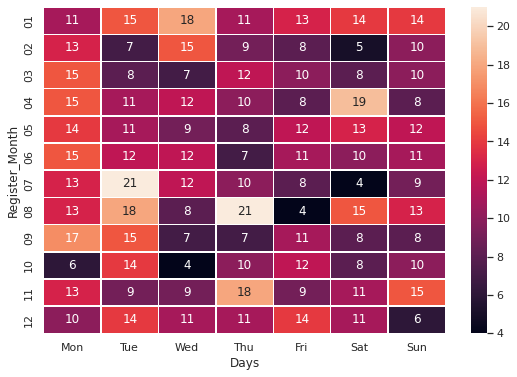

In [ ]:
#Activities for Female User
heatmap2 = HeatF.pivot("Register_Month","Days","user_id")
sns.set_theme()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(heatmap2, annot=True,fmt='d',linewidth=.5,ax=ax)

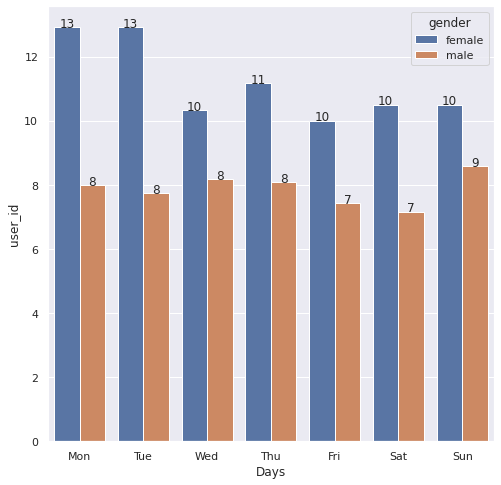

In [ ]:
#Difference user activities by Gender
sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))
ax = sns.barplot(x="Days", y="user_id", hue="gender", 
            data=Heatmap, ci=None)
#Adding Label
for p in ax.patches:
 height = p.get_height()
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0, 
 s = '{:.0f}'.format(height),
 ha = 'center')

# Part IV : Clustering Analysis

### Importing Module

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 2322 to 2326
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              1602 non-null   object        
 1   register_date        1602 non-null   datetime64[ns]
 2   name                 1602 non-null   object        
 3   gender               1602 non-null   object        
 4   province             1602 non-null   object        
 5   city                 1602 non-null   object        
 6   event_name           1602 non-null   object        
 7   transaction-date     1602 non-null   datetime64[ns]
 8   transaction_item_id  1602 non-null   object        
 9   transaction_id       1602 non-null   object        
 10  Event_name           1602 non-null   object        
 11  product_id           1602 non-null   object        
 12  qty                  1602 non-null   int64         
 13  price                1602 non-

In [ ]:
#Preparing our dataset
df_clust = df1.copy()
df_clust = df1.drop(columns=['user_id','register_date','name','city','transaction_item_id',
                    'transaction-date','transaction_id','product_id','payment_id','Register_Year',
                    'Register_Month','Register_Day','Days'],axis=1,inplace=True)

### Creating Dummies

In [ ]:
df1

,gender,province,event_name,Event_name,qty,price,total_amount,payment_method
2322,female,DKI Jakarta,Completed,Completed,1,200000,200000,paylater
2959,female,Jawa Barat,Completed,Completed,1,800000,800000,paylater
491,male,Jawa Barat,Completed,Completed,1,720000,720000,paylater
5391,male,Jawa Barat,Completed,Completed,1,50000,50000,transfer
5378,male,Banten,Completed,Completed,1,15000,15000,transfer
...,...,...,...,...,...,...,...,...
5406,male,Jawa Barat,Completed,Completed,1,75000,75000,transfer
2141,female,Jawa Tengah,Completed,Completed,1,300000,300000,paylater
5394,male,Jawa Barat,Completed,Completed,1,20000,20000,transfer
476,male,DKI Jakarta,Cancelled,Cancelled,1,720000,720000,paylater


In [ ]:
df_clust =pd.get_dummies(df1)
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 2322 to 2326
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   qty                         1602 non-null   int64
 1   price                       1602 non-null   int64
 2   total_amount                1602 non-null   int64
 3   gender_female               1602 non-null   uint8
 4   gender_male                 1602 non-null   uint8
 5   province_Banten             1602 non-null   uint8
 6   province_DKI Jakarta        1602 non-null   uint8
 7   province_Jawa Barat         1602 non-null   uint8
 8   province_Jawa Tengah        1602 non-null   uint8
 9   province_Jawa Timur         1602 non-null   uint8
 10  event_name_Cancelled        1602 non-null   uint8
 11  event_name_Completed        1602 non-null   uint8
 12  Event_name_Cancelled        1602 non-null   uint8
 13  Event_name_Completed        1602 non-null   uint8
 14  payme

In [ ]:
df_clust.drop(columns=['qty','price','Event_name_Cancelled','Event_name_Completed'],axis=1,inplace=True)

In [ ]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 2322 to 2326
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   total_amount                1602 non-null   int64
 1   gender_female               1602 non-null   uint8
 2   gender_male                 1602 non-null   uint8
 3   province_Banten             1602 non-null   uint8
 4   province_DKI Jakarta        1602 non-null   uint8
 5   province_Jawa Barat         1602 non-null   uint8
 6   province_Jawa Tengah        1602 non-null   uint8
 7   province_Jawa Timur         1602 non-null   uint8
 8   event_name_Cancelled        1602 non-null   uint8
 9   event_name_Completed        1602 non-null   uint8
 10  payment_method_credit card  1602 non-null   uint8
 11  payment_method_debit card   1602 non-null   uint8
 12  payment_method_e-wallet     1602 non-null   uint8
 13  payment_method_paylater     1602 non-null   uint8
 14  payme

### Standarize

In [ ]:
scaled_x = scaler.fit_transform(df_clust[['total_amount']])
scaled_x

array([[-0.63596279],
       [ 0.53529147],
       [ 0.37912423],
       ...,
       [-0.98733907],
       [ 0.37912423],
       [-0.63596279]])

### K-means

In [ ]:
model = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
cluster_labels = model.fit_predict(scaled_x)
df_clust['Cluster'] = cluster_labels
df_clust.head()

,total_amount,gender_female,gender_male,province_Banten,province_DKI Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,event_name_Cancelled,event_name_Completed,payment_method_credit card,payment_method_debit card,payment_method_e-wallet,payment_method_paylater,payment_method_transfer,Cluster
2322,200000,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2959,800000,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
491,720000,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
5391,50000,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
5378,15000,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0


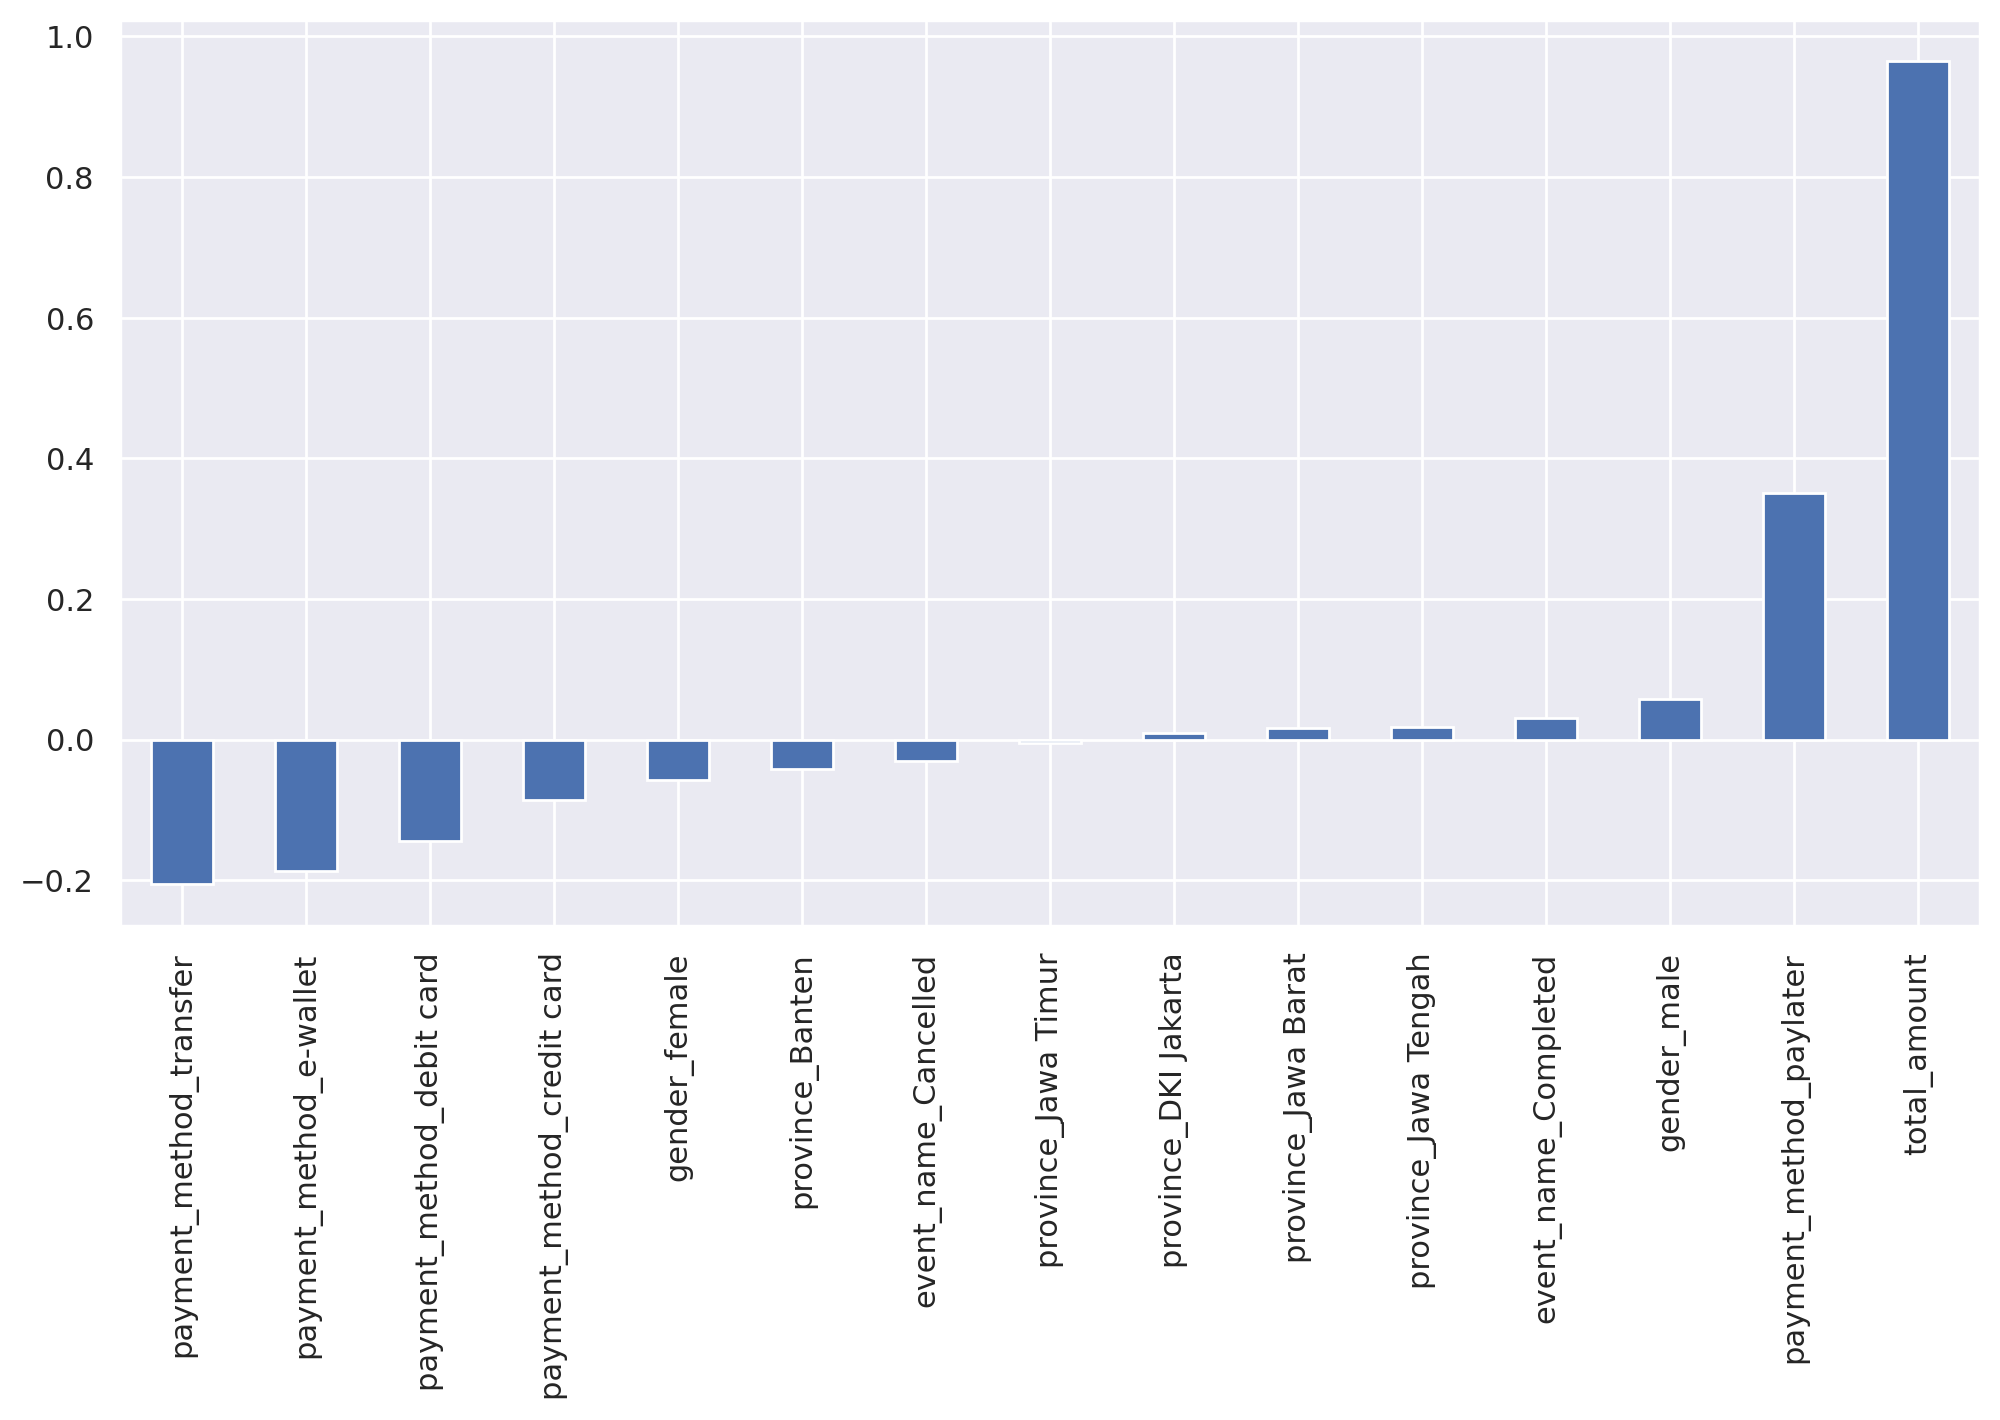

In [ ]:
#Correlation
plt.figure(figsize=(12,6),dpi=200)
df_clust.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [ ]:
#See the elbow method
ssd = []
for k in range(2,15) :
    model = KMeans(n_clusters=k)
    model.fit(scaled_x)
    ssd.append(model.inertia_)
ssd

[450.89875933919245,
 106.48257932787521,
 67.33178601365276,
 47.89489664866082,
 30.76444808855492,
 20.875537291510454,
 16.02995759769876,
 12.69247086845394,
 10.342385867562177,
 8.306727932784472,
 7.066209975037887,
 5.546437950549368,
 4.750211326976542]

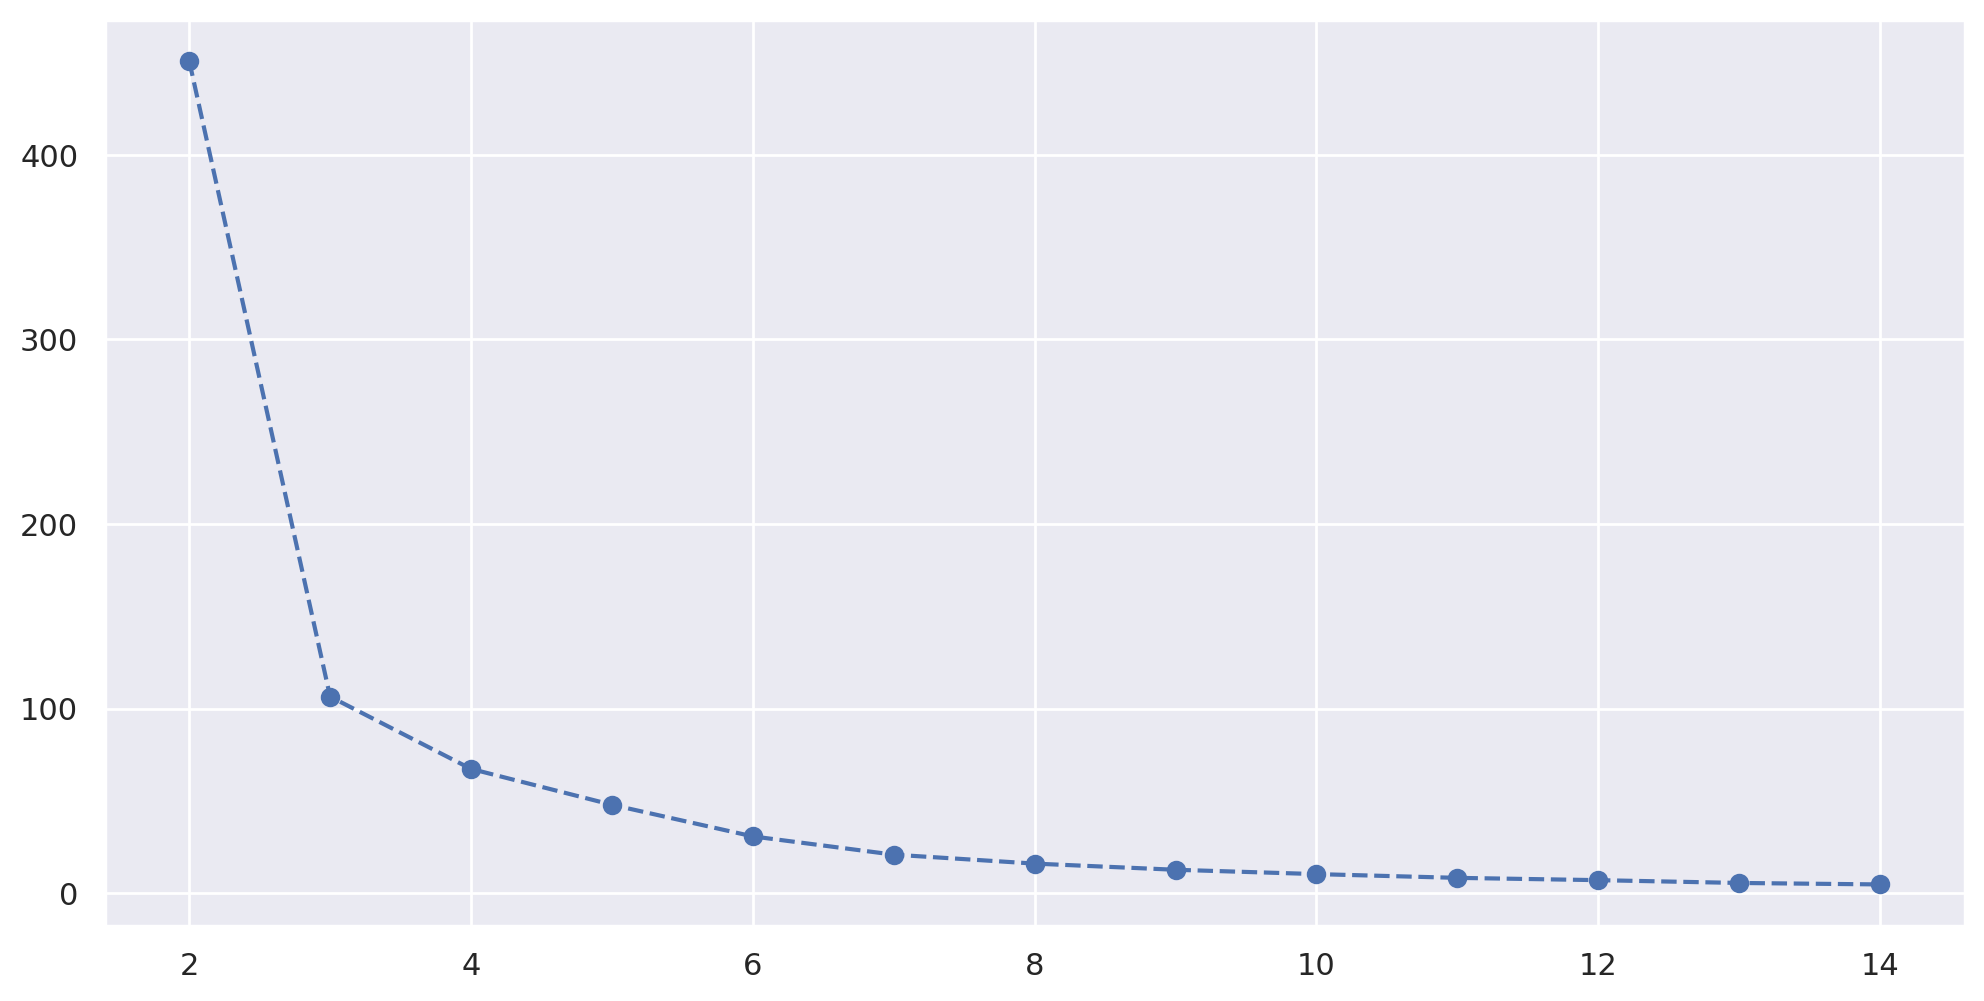

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(2,15),ssd,'o--')

In [ ]:
#Find the difference between cluster
pd.Series(ssd).diff()

0            NaN
1    -344.416180
2     -39.150793
3     -19.436889
4     -17.130449
5      -9.888911
6      -4.845580
7      -3.337487
8      -2.350085
9      -2.035658
10     -1.240518
11     -1.519772
12     -0.796227
dtype: float64

### Sillhouette Analysis

In [ ]:
!gdown --id '15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l'
from silhoutte import silhoutte_analysis

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 2.38MB/s]


In [ ]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 2322 to 2326
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   total_amount                1602 non-null   int64
 1   gender_female               1602 non-null   uint8
 2   gender_male                 1602 non-null   uint8
 3   province_Banten             1602 non-null   uint8
 4   province_DKI Jakarta        1602 non-null   uint8
 5   province_Jawa Barat         1602 non-null   uint8
 6   province_Jawa Tengah        1602 non-null   uint8
 7   province_Jawa Timur         1602 non-null   uint8
 8   event_name_Cancelled        1602 non-null   uint8
 9   event_name_Completed        1602 non-null   uint8
 10  payment_method_credit card  1602 non-null   uint8
 11  payment_method_debit card   1602 non-null   uint8
 12  payment_method_e-wallet     1602 non-null   uint8
 13  payment_method_paylater     1602 non-null   uint8
 14  payme

For n_clusters = 2 The average silhouette_score is : 0.7074871773060644
For n_clusters = 3 The average silhouette_score is : 0.7830206693825326
For n_clusters = 4 The average silhouette_score is : 0.7708318050239179
For n_clusters = 5 The average silhouette_score is : 0.7226161299219576
For n_clusters = 6 The average silhouette_score is : 0.6779974832681979
For n_clusters = 7 The average silhouette_score is : 0.68264617865012
For n_clusters = 8 The average silhouette_score is : 0.6986362505738716


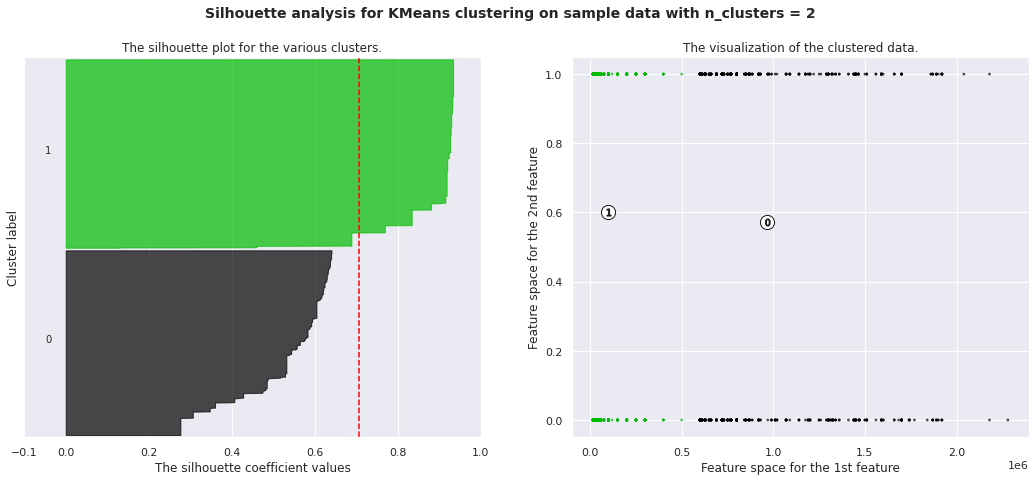

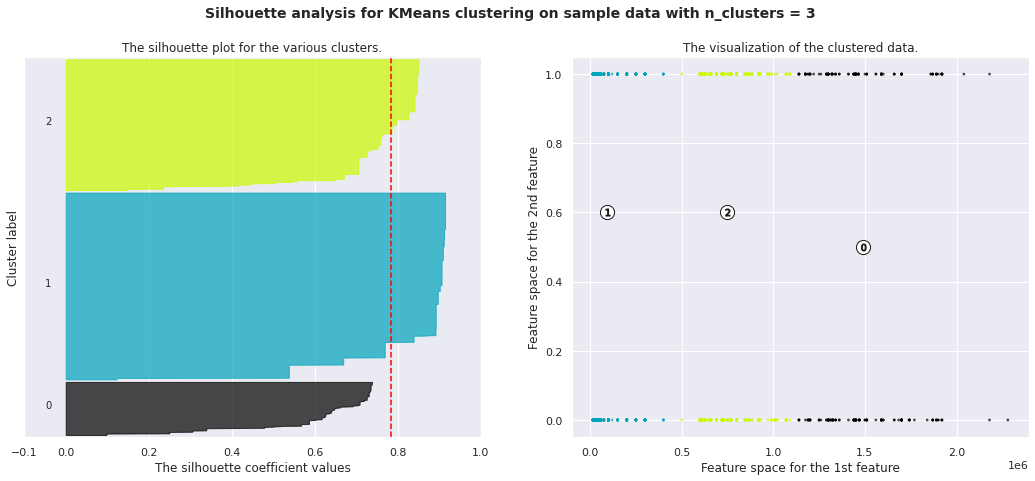

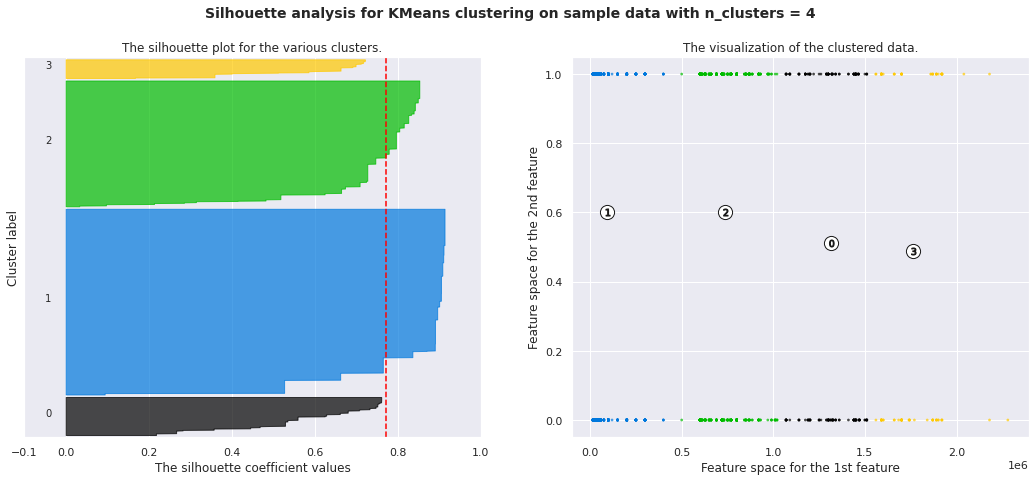

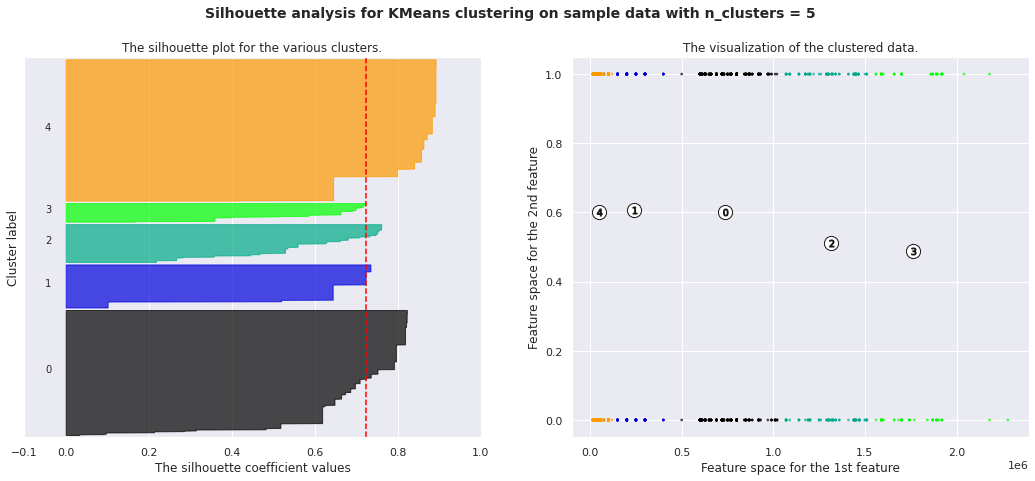

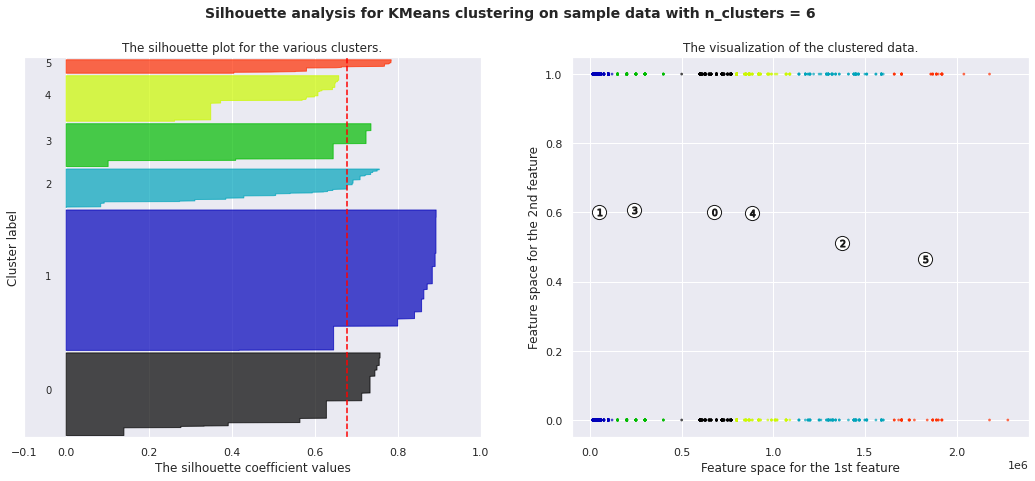

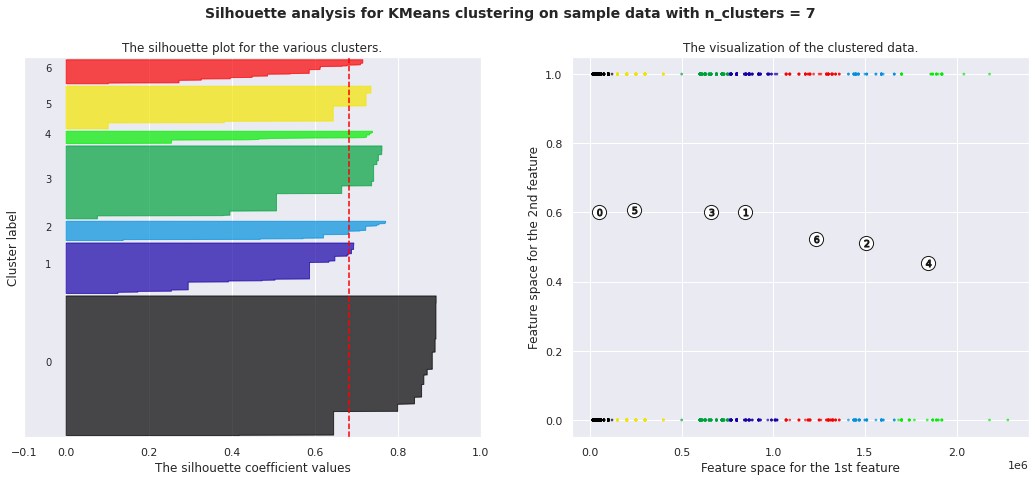

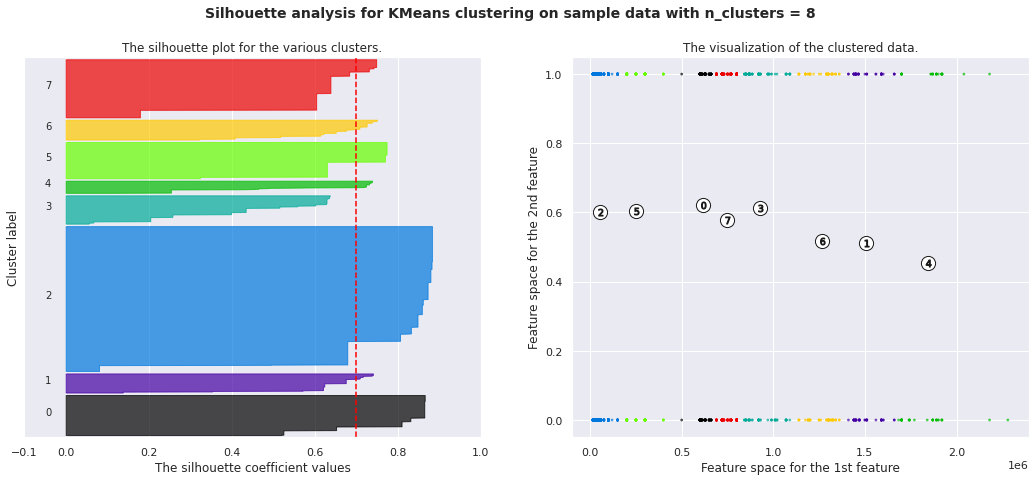

In [ ]:
#Creating Silhouette
silhoutte_analysis(df_clust,list(range(2,9)))

### Clustering

In [ ]:
Avg = df_clust.groupby(['Cluster'],as_index=False).mean()
Avg

,Cluster,total_amount,gender_female,gender_male,province_Banten,province_DKI Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,event_name_Cancelled,event_name_Completed,payment_method_credit card,payment_method_debit card,payment_method_e-wallet,payment_method_paylater,payment_method_transfer
0,0,9.486369e+04,0.60223,0.39777,0.143742,0.423792,0.225527,0.066914,0.140025,0.111524,0.888476,0.021066,0.055762,0.114002,0.619579,0.189591
1,1,7.479611e+05,0.60000,0.40000,0.136283,0.426549,0.251327,0.061947,0.123894,0.102655,0.897345,0.001770,0.003540,0.021239,0.897345,0.076106
2,2,1.491980e+06,0.50000,0.50000,0.095652,0.439130,0.234783,0.086957,0.143478,0.082609,0.917391,0.000000,0.000000,0.004348,0.982609,0.013043


In [ ]:
Total = df_clust['total_amount'].groupby(df_clust['Cluster']).agg(['count','mean','max','min','sum']).reset_index()
Total

,Cluster,count,mean,max,min,sum
0,0,807,9.486369e+04,400000,15000,76555000
1,1,565,7.479611e+05,1090000,500000,422598000
2,2,230,1.491980e+06,2280000,1140000,343155400


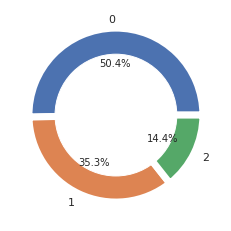

In [ ]:
#Revenue Chart
names = Total['Cluster']
size = Total['count']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names,
        autopct="%.1f%%",wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [ ]:
Total_Revenue = df_clust['total_amount'].groupby(df_clust['Cluster']).sum().reset_index()
Total_Revenue

,Cluster,total_amount
0,0,76555000
1,1,422598000
2,2,343155400


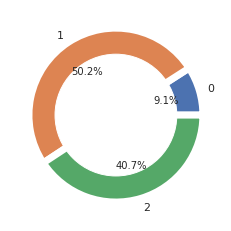

In [ ]:
#Revenue Chart
names = Total_Revenue['Cluster']
size = Total_Revenue['total_amount']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names,
        autopct="%.1f%%",wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


Insight : 


# RFM Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15315
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              15316 non-null  object        
 1   register_date        15316 non-null  datetime64[ns]
 2   name                 15316 non-null  object        
 3   gender               15316 non-null  object        
 4   province             15316 non-null  object        
 5   city                 15316 non-null  object        
 6   event_name           15316 non-null  object        
 7   transaction-date     15316 non-null  datetime64[ns]
 8   transaction_item_id  15316 non-null  object        
 9   transaction_id       15316 non-null  object        
 10  Event_name           15316 non-null  object        
 11  product_id           15316 non-null  object        
 12  qty                  15316 non-null  int64         
 13  price                15316 non-

In [ ]:
#Importing Necessery Module
import datetime as dt
now = dt.datetime(2022,1,1)

In [ ]:
#Creating RFM
rfm = df.groupby('user_id').agg({'transaction-date' :lambda day :(now - day.max()).days,
                                 'user_id' : lambda num : len(num),
                                 'total_amount' : lambda total_amount : total_amount.sum()
                                 })
col_list = ['Recency','Frequency','Monetary']
rfm.columns = col_list
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1602 entries, 10000 to 20998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    1602 non-null   int64
 1   Frequency  1602 non-null   int64
 2   Monetary   1602 non-null   int64
dtypes: int64(3)
memory usage: 50.1+ KB


In [ ]:
rfm.head()

,Recency,Frequency,Monetary
user_id,,,
10000,375,2,95000
10001,44,4,410000
10002,8,7,780000
10003,143,3,165000
10004,218,4,505000


In [ ]:
#Creating Rank for RFM
rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=False)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=False)
#Normalize
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100
rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm.head()

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
user_id,,,,,,
10000,375,2,95000,8.424679,92.369349,89.975016
10001,44,4,410000,68.462261,73.292722,71.392879
10002,8,7,780000,93.266521,47.675537,46.439725
10003,143,3,165000,33.166301,82.879128,80.730793
10004,218,4,505000,20.701535,73.292722,71.392879


In [ ]:
# Calculating RFM score
rfm['RFM_Score_Total'] = 0.15*rfm['R_rank_norm']+0.28 * \
	rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score_Total'] *= 0.05
rfm = rfm.round(2)
rfm	

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score_Total
user_id,,,,,,,
10000,375,2,95000,8.42,92.37,89.98,3.92
10001,44,4,410000,68.46,73.29,71.39,3.57
10002,8,7,780000,93.27,47.68,46.44,2.69
10003,143,3,165000,33.17,82.88,80.73,3.71
10004,218,4,505000,20.70,73.29,71.39,3.22
...,...,...,...,...,...,...,...
20988,17,27,35788400,85.00,6.60,6.43,0.91
20989,88,18,22462000,48.29,15.17,14.77,1.00
20990,33,23,32744000,75.54,10.10,9.84,0.99


In [ ]:
rfm['RFM_Score_Total'].describe()

count    1602.000000
mean        2.522965
std         1.166544
min         0.370000
25%         1.490000
50%         2.470000
75%         3.570000
max         4.920000
Name: RFM_Score_Total, dtype: float64

1. Rfm <1.5 = Low Value Customer
2. RFM 1.5 - 2.5 = Middle Value Customer
3. RFM 2.5 - 3.6 = Middle-High Value Customer
4. 3.6 - 5 = High Value Customer

In [ ]:
rfm["CustomerSegmentation"] = np.where(rfm['RFM_Score_Total'] >
                                      4.5, "Sultan",
                                      (np.where(
                                        rfm['RFM_Score_Total'] > 3.5,
                                        "Crazy Rich",
                                        (np.where(
    rfm['RFM_Score_Total'] > 1.5,
                             "BPJS(Budget Pas Jiwa Sosialita)",
                              'Rakyat Jelata')))))

In [ ]:
rfm_groupby = rfm.groupby('CustomerSegmentation')['Recency', 'Frequency', 'Monetary'].agg(['count', 'mean', 'median', 'sum'])
rfm_groupby

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Recency                            Frequency  \
                                  count        mean median     sum     count   
CustomerSegmentation                                                           
BPJS(Budget Pas Jiwa Sosialita)     774  133.679587   94.0  103468       774   
Crazy Rich                          364  201.480769  140.5   73339       364   
Rakyat Jelata                       412   74.786408   50.5   30812       412   
Sultan                               52   50.576923   55.0    2630        52   

                                                        Monetary  \
                                      mean median   sum    count   
CustomerSegmentation                                               
BPJS(Budget Pas Jiwa Sosialita)   6.939276    6.0  5371      774   
Crazy Rich                        2.497253    2.0   909      364   
Rakyat Jelata                    21.793689   20.0  8979      412   
Sultan                            1.096154    1.0    57       52   

                                                                        
                                         mean      median          sum  
CustomerSegmentation                                                    
BPJS(Budget Pas Jiwa Sosialita)  3.280051e+06   1045000.0   2538759200  
Crazy Rich                       4.014423e+05    220000.0    146125000  
Rakyat Jelata                    2.640651e+07  26310200.0  10879483800  
Sultan                           1.663462e+05     50000.0      8650000

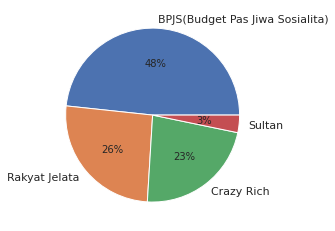

In [ ]:
# Visualizing the customer segments
plt.pie(rfm['CustomerSegmentation'].value_counts(),
		labels=rfm['CustomerSegmentation'].value_counts().index,
		autopct='%.0f%%')
plt.show()

# Extra Miles : Cohort Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15315
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              15316 non-null  object        
 1   register_date        15316 non-null  datetime64[ns]
 2   name                 15316 non-null  object        
 3   gender               15316 non-null  object        
 4   province             15316 non-null  object        
 5   city                 15316 non-null  object        
 6   event_name           15316 non-null  object        
 7   transaction-date     15316 non-null  datetime64[ns]
 8   transaction_item_id  15316 non-null  object        
 9   transaction_id       15316 non-null  object        
 10  Event_name           15316 non-null  object        
 11  product_id           15316 non-null  object        
 12  qty                  15316 non-null  int64         
 13  price                15316 non-

In [ ]:
import missingno as msno
import datetime as dt
from textwrap import wrap

In [ ]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1) 
# Create transaction_date column based on month and store in TransactionMonth
df['transaction-date'] = df['transaction-date'].apply(get_month) 
# Grouping by customer_id and select the Transaction date
grouping = df.groupby('user_id')['transaction-date'] 
# Assigning a minimum Transaction Date  to the dataset
df['CohortMonth'] = grouping.transform('min')
# printing top 5 rows
print(df.head())

  user_id register_date                 name gender     province  \
0   10000    2020-01-16       Warta Pradipta   male  DKI Jakarta   
1   10000    2020-01-16       Warta Pradipta   male  DKI Jakarta   
2   10001    2018-03-10  Jaya Mahendra S.Ked   male   Jawa Timur   
3   10001    2018-03-10  Jaya Mahendra S.Ked   male   Jawa Timur   
4   10001    2018-03-10  Jaya Mahendra S.Ked   male   Jawa Timur   

            city event_name transaction-date transaction_item_id  \
0  Jakarta Utara  Completed       2020-12-01             3013631   
1  Jakarta Utara  Completed       2020-12-01             3013632   
2       Surabaya  Completed       2020-12-01             3013411   
3       Surabaya  Completed       2020-12-01             3013412   
4       Surabaya  Completed       2021-11-01             3066581   

  transaction_id Event_name product_id  qty   price  total_amount payment_id  \
0         301363  Completed      10012    1   75000         75000          5   
1         301363  Comp

In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the Transaction date column
transcation_year, transaction_month, _ = get_date_int(df, 'transaction-date')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

In [ ]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """
df['CohortIndex'] = years_diff * 12 + months_diff  + 1 
print(df.head(5))

  user_id register_date                 name gender     province  \
0   10000    2020-01-16       Warta Pradipta   male  DKI Jakarta   
1   10000    2020-01-16       Warta Pradipta   male  DKI Jakarta   
2   10001    2018-03-10  Jaya Mahendra S.Ked   male   Jawa Timur   
3   10001    2018-03-10  Jaya Mahendra S.Ked   male   Jawa Timur   
4   10001    2018-03-10  Jaya Mahendra S.Ked   male   Jawa Timur   

            city event_name transaction-date transaction_item_id  \
0  Jakarta Utara  Completed       2020-12-01             3013631   
1  Jakarta Utara  Completed       2020-12-01             3013632   
2       Surabaya  Completed       2020-12-01             3013411   
3       Surabaya  Completed       2020-12-01             3013412   
4       Surabaya  Completed       2021-11-01             3066581   

  transaction_id Event_name product_id  qty   price  total_amount payment_id  \
0         301363  Completed      10012    1   75000         75000          5   
1         301363  Comp

In [ ]:
# Counting daily active user from each chort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique user Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'user_id')
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,user_id
0,2020-01-01,1,196
1,2020-01-01,2,46
2,2020-01-01,3,52
3,2020-01-01,4,54
4,2020-01-01,5,56


In [ ]:
#Calculate the retention rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,100.0,23.5,26.5,27.6,28.6,24.0,26.5,23.5,24.0,51.5,46.4,53.1,27.0,32.1,30.6,36.2,30.1,30.1,42.9,37.2,37.8,41.8,34.7,27.0
2020-02-01,100.0,26.5,27.1,21.9,29.0,23.2,25.2,21.3,45.2,44.5,47.7,29.0,25.2,34.2,25.2,34.8,25.2,36.1,33.5,36.1,34.2,40.6,36.1,NaN
2020-03-01,100.0,22.6,25.0,16.1,16.1,22.6,14.5,41.1,48.4,42.7,27.4,25.0,28.2,26.6,31.5,28.2,24.2,31.5,29.0,35.5,26.6,32.3,NaN,NaN
2020-04-01,100.0,17.1,19.4,27.1,24.0,23.3,41.1,41.9,37.2,19.4,25.6,27.1,24.0,27.1,27.1,27.1,28.7,25.6,24.8,31.0,23.3,NaN,NaN,NaN
2020-05-01,100.0,16.5,19.8,19.8,17.6,35.2,33.0,42.9,14.3,20.9,23.1,22.0,25.3,27.5,23.1,23.1,30.8,24.2,25.3,25.3,NaN,NaN,NaN,NaN
2020-06-01,100.0,15.9,17.0,23.9,26.1,35.2,31.8,19.3,14.8,18.2,19.3,26.1,14.8,20.5,19.3,27.3,26.1,14.8,20.5,NaN,NaN,NaN,NaN,NaN
2020-07-01,100.0,14.4,20.2,21.2,30.8,22.1,12.5,17.3,24.0,26.0,22.1,26.9,17.3,19.2,23.1,21.2,23.1,19.2,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,100.0,11.6,33.7,19.8,27.9,10.5,15.1,12.8,17.4,16.3,11.6,18.6,27.9,14.0,12.8,19.8,16.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,100.0,30.6,16.7,27.8,6.9,12.5,12.5,18.1,11.1,12.5,19.4,22.2,11.1,20.8,22.2,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


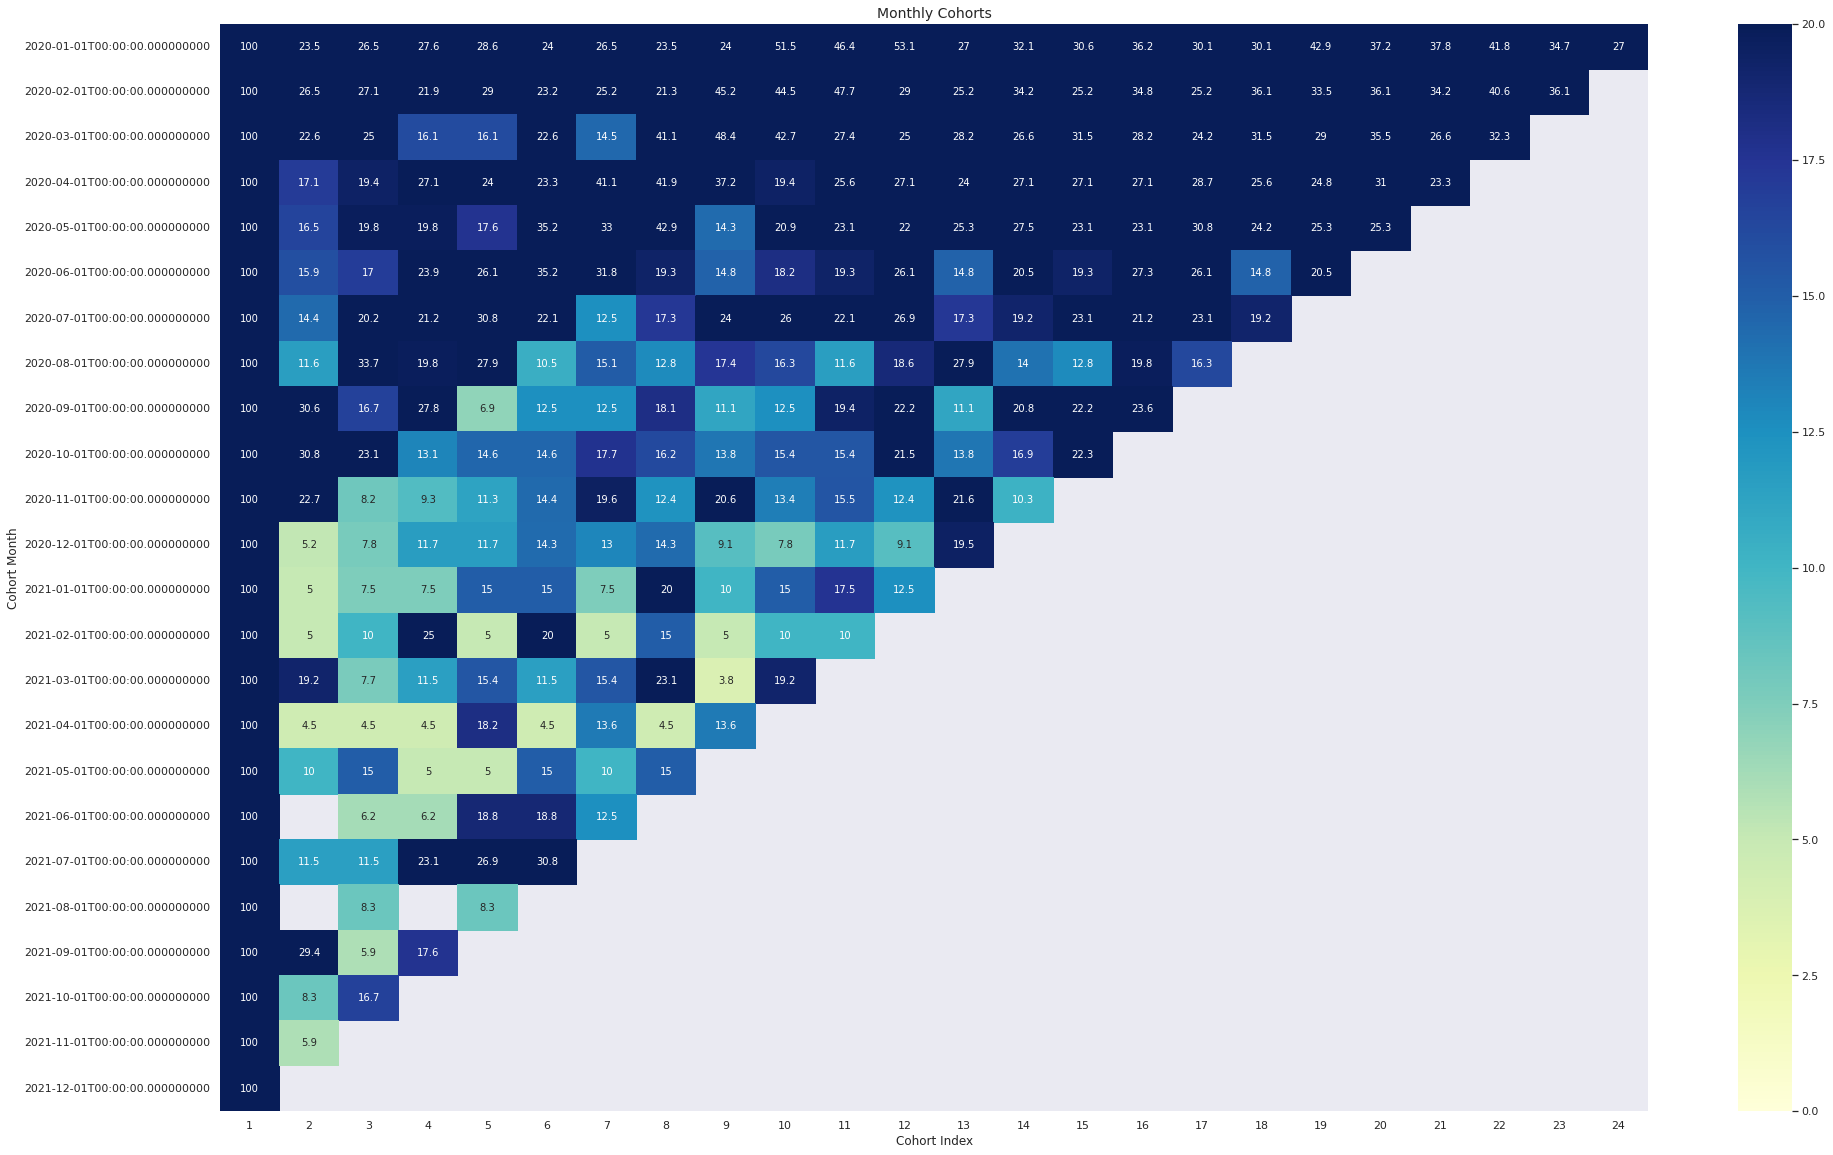

In [ ]:
# Initialize the figure
plt.figure(figsize=(32, 20))
# Adding a title
plt.title('Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap((retention.round(3)*100), annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()